<a href="https://colab.research.google.com/github/ravipratap366/Arima/blob/master/inspection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a

In [51]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
import cv2

In [ ]:
#!pip3 install split-folders
!git clone https://github.com/ultralytics/yolov5  # clone
!ls
!cd yolov5
#!pip install -r requirements.txt  # install
!python -m pip install --upgrade pip
!pip3 install --upgrade pip
!pip3 install opencv-python

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [4]:
path = '/content/drive/MyDrive/inspection_data/20220502_130057.jpg'
img = cv2.imread(path)

In [5]:
results = model(img)
results.print()

image 1/1: 4032x3024 1 book
Speed: 13.2ms pre-process, 3635.9ms inference, 53.2ms NMS per image at shape (1, 3, 640, 480)


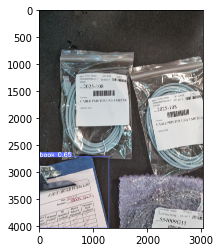

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow


In [123]:
# Load image, grayscale, median blur, sharpen image
image = cv2.imread('/content/drive/MyDrive/inspection_data/20220502_130423.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

# Threshold and morph close
thresh = cv2.threshold(sharpen, 160, 255, cv2.THRESH_BINARY_INV)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
kernel1 = np.ones((8,8))
imgDial = cv2.dilate(close,kernel1,iterations=3)
imgThre = cv2.erode(imgDial,kernel1,iterations=2)
imgThre=cv2.bitwise_not(imgThre)
imgDial1 = cv2.dilate(imgThre,kernel1,iterations=5)





0.9720670391061452


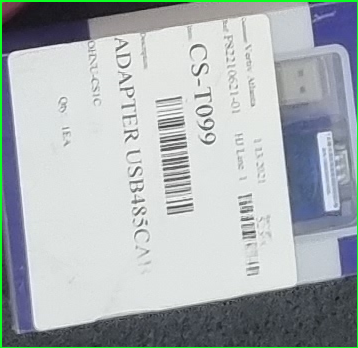

1
0.9357142857142857


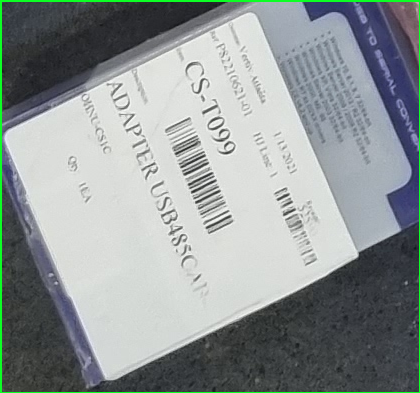

2
0.9719626168224299


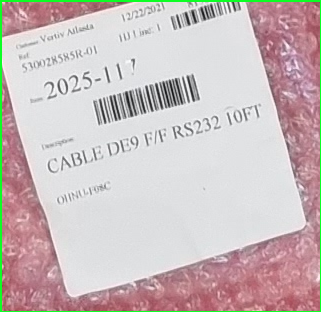

3
1.2636103151862463


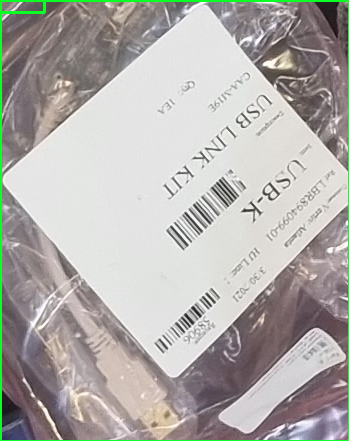

4
0.863768115942029


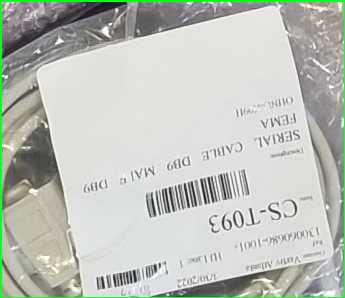

5
1.0576271186440678


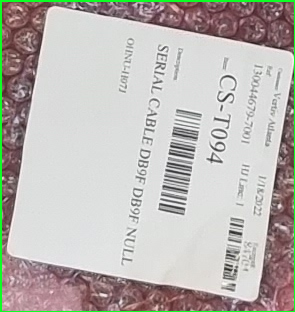

6
0.9620991253644315


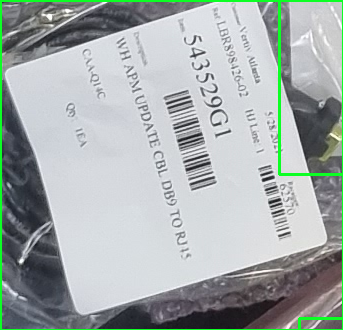

7
1.0


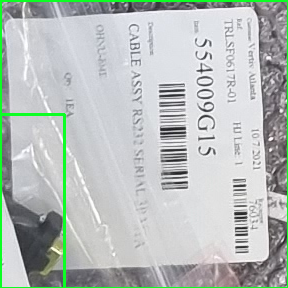

8
1.0633333333333332


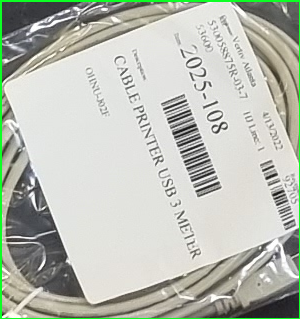

9
1.0033222591362125


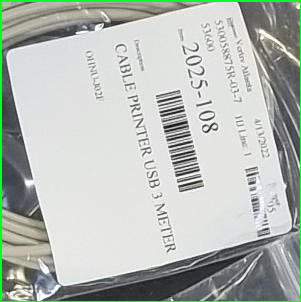

10


In [127]:
# Find contours and filter using threshold area
cnts = cv2.findContours(imgDial1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 50000
max_area = 110000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        if h/w < 1.5 and w/h < 1.5:
          print(h/w)
          ROI = image[y:y+h, x:x+w]
          cv2_imshow(ROI)
          cv2.imwrite('final_rec_{}.png'.format(image_number), ROI)
          cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
          image_number += 1
          print(image_number)
        else:
          pass



In [ ]:
cv2_imshow(sharpen)

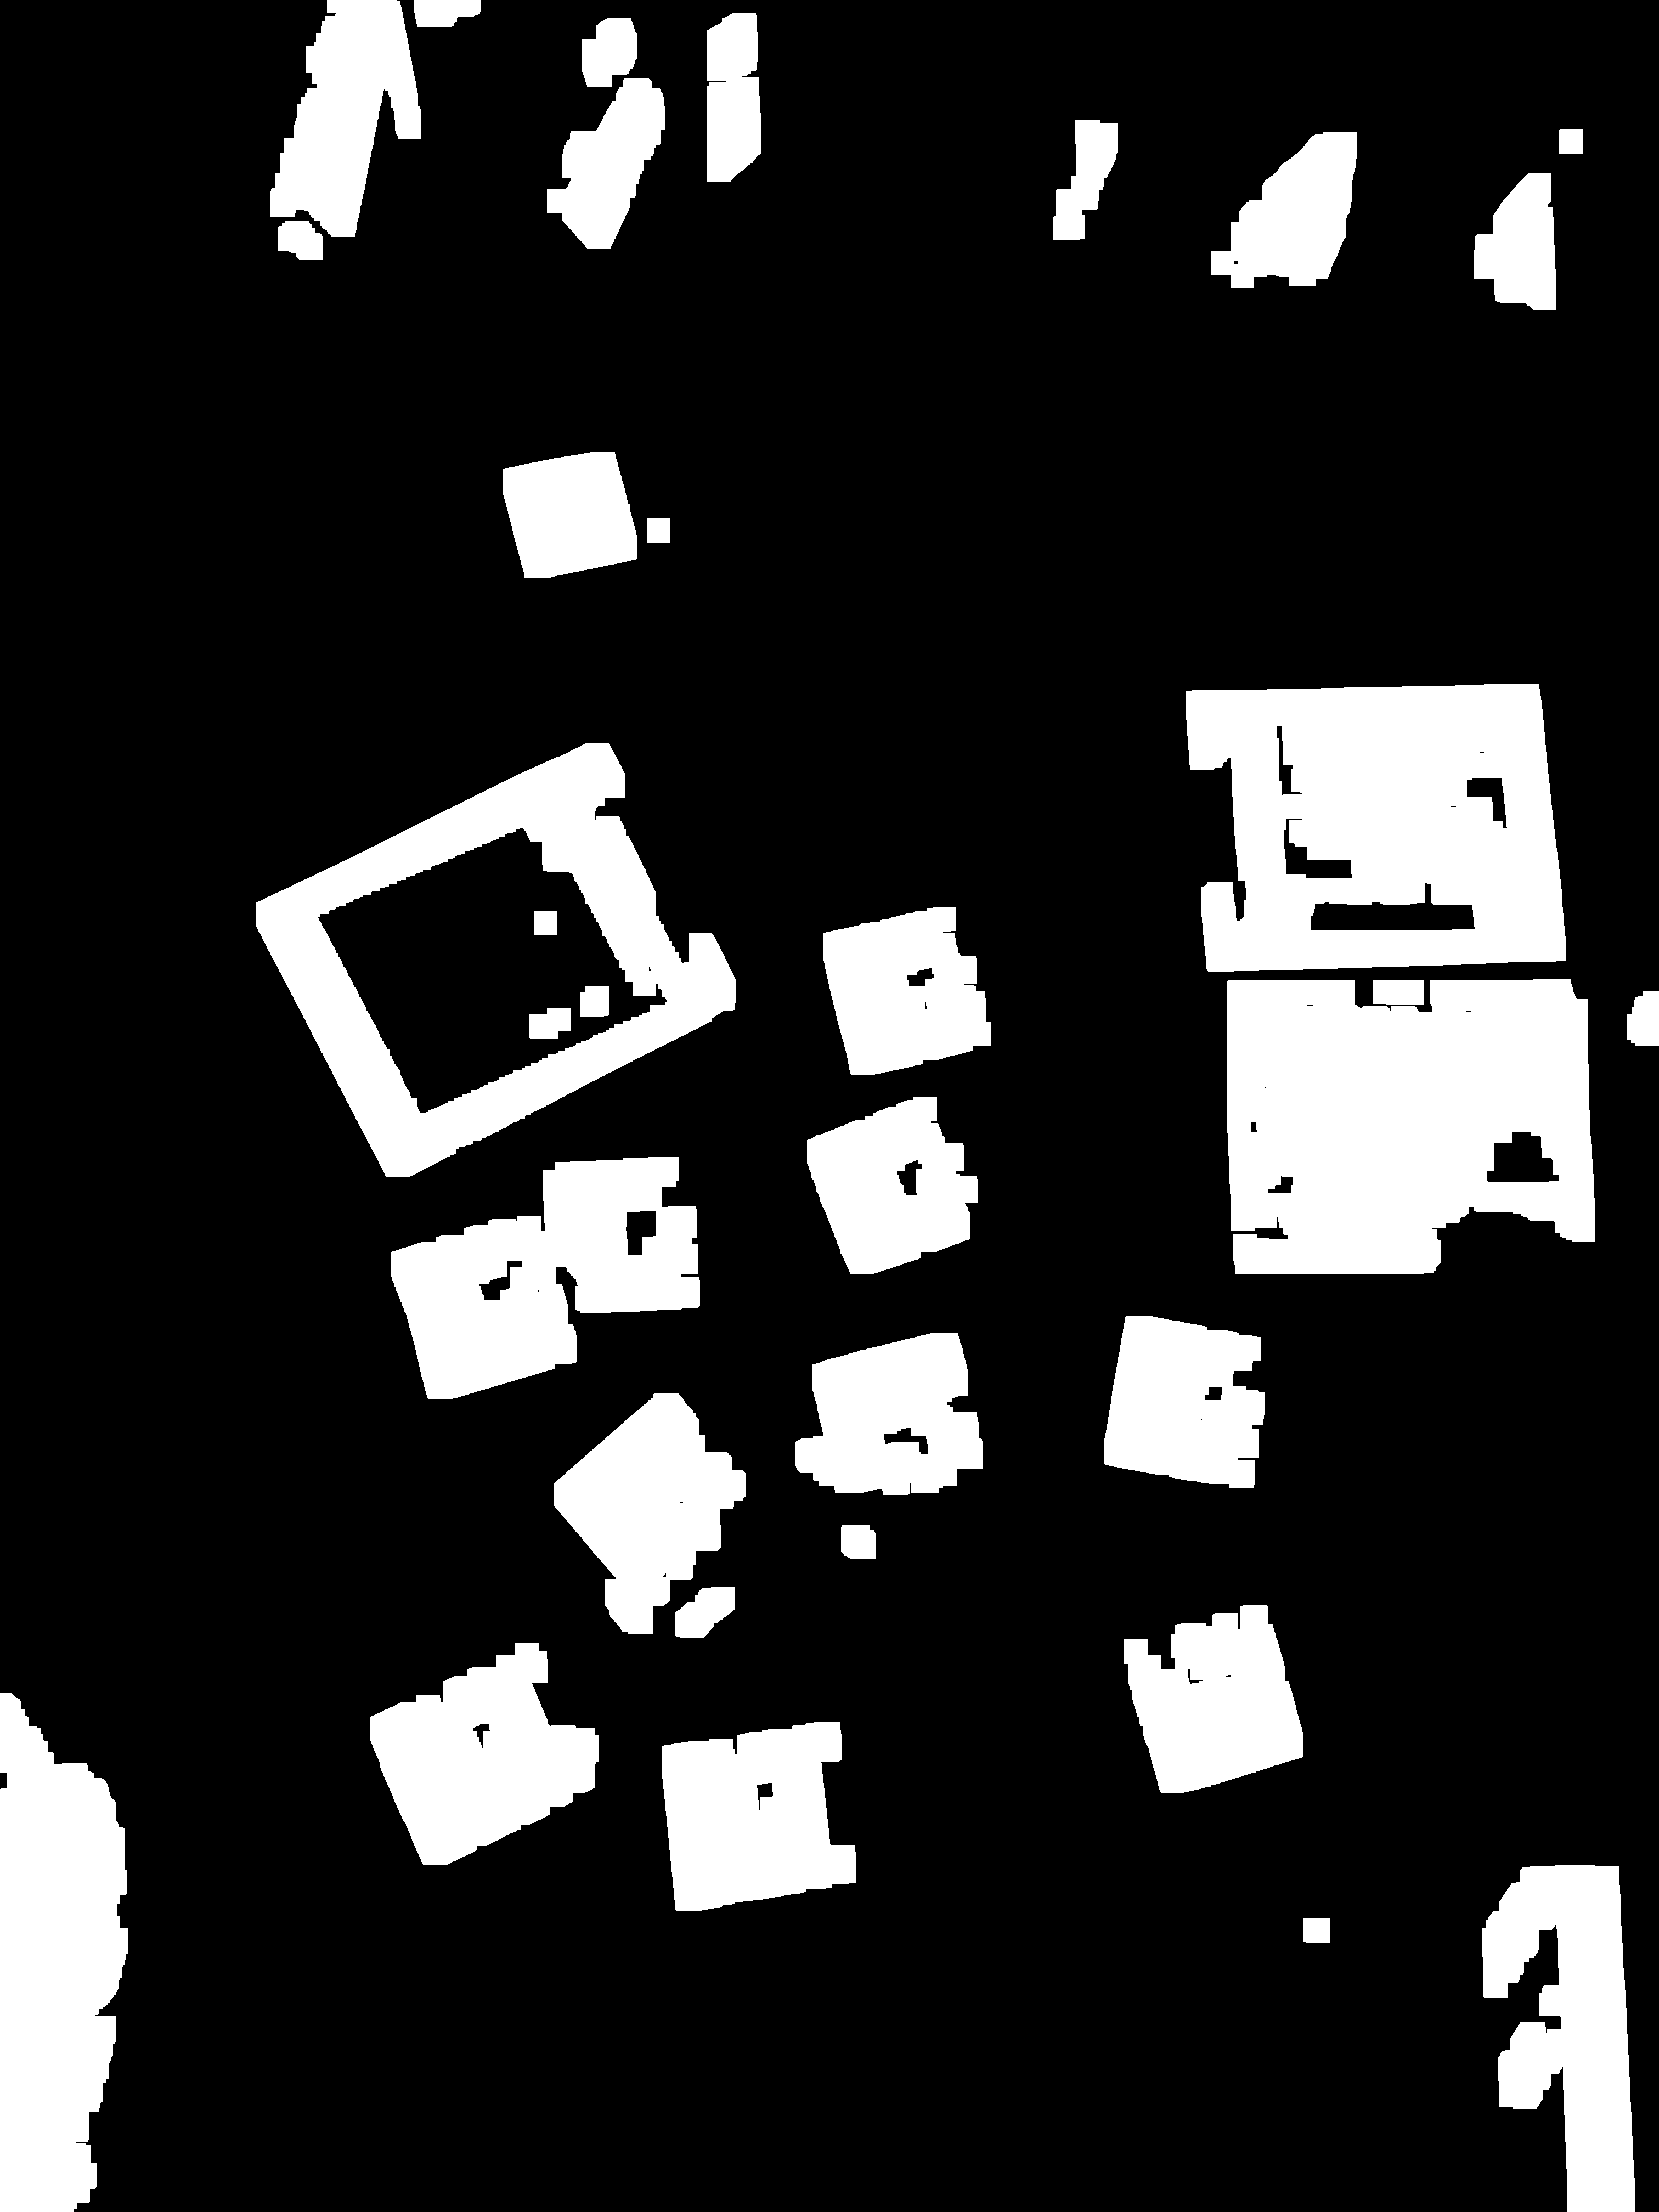

In [104]:
cv2_imshow( imgDial1)